## MG-GY 8401: Programming for Business Intelligence and Analytics
### Lecture 6

We will take a look at some components of the `pandas` package

1. Missing Values
1. Bucketing Numbers
1. Grouping Records
1. Reshaping Tables

Note that Python has several versions. We will be using **Python 3.7**.

In [5]:
my_table = pd.DataFrame({"column 0": [1,2,3], "column 1": [2,3,4]})
my_table

,column 0,column 1
0,1,2
1,2,3
2,3,4


In [10]:
my_table_1 = np.array([[1,2,3],[3,2,43,3]])

/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [25]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
plt.rcParams['figure.figsize'] = (10,8)

# indicate path to data 

import os
path_to_dataset = os.environ["HOME"] + "/shared/lecture-6/nyc_restaurant_inspections.csv"

In Homework 6, we will study data from the New York City Department of Health and Mental Hygiene. The data contains information about inspections of each of New York City's 24,000 restaurants. Each restaurant receives a grade of A,B,C based on a score that tallies points from health violations. 

In [26]:
violations = pd.read_csv(path_to_dataset)
violations.head(3)

,CAMIS,RECORD DATE,VIOLATION DESCRIPTION,SCORE,desc,is_clean,is_vermin,is_surface,is_human,is_permit
0,50018511,11/05/2018,Filth flies or food/refuse/sewage-associated (...,19.0,filth flies or food/refuse/sewage-associated f...,0,0,0,0,0
1,50012427,11/05/2018,Non-food contact surface improperly constructe...,19.0,non-food contact surface improperly constructe...,1,0,1,0,0
2,50075209,11/05/2018,Personal cleanliness inadequate. Outer garment...,13.0,personal cleanliness inadequate. outer garment...,1,0,0,1,0


We have a sample from the dataset consisting of 19092 restaurant inspections. 

In [27]:
violations.columns

Index(['CAMIS', 'RECORD DATE', 'VIOLATION DESCRIPTION', 'SCORE', 'desc',
       'is_clean', 'is_vermin', 'is_surface', 'is_human', 'is_permit'],
      dtype='object')

We have 10 columns

- `CAMIS` : unique identifier of the restaurant 
- `RECORD DATE` : date of inspection 
- `VIOLATION DESCRIPTION` : description of violations
- `SCORE` : score of the restaurant following health inspection
- `desc` : detailed description of violation 
- `is_clean`, `is_vermin`, `is_surface`, `is_human`, `is_permit`
 * type of violation 
 
Note that the score translates to rating of  `A,B,C`. If the score is low, then the rating is high. 

### Missing Values

Commonly we have to deal with missing values. While we find different approahces to indicating missing values, we should use `np.NaN`. The acronym `NaN` stands for Not a Number. The special variable contained in the `numpy` packages allows us to indicate missing values in a conventional way.

In [28]:
print(violations["SCORE"].isna())
print('\n')
print(violations["SCORE"].isnull())
print('\n')
print(np.all(violations["SCORE"].isna() == violations["SCORE"].isnull()))
# isna() might be the same as isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
19087    False
19088    False
19089    False
19090    False
19091    False
Name: SCORE, Length: 19092, dtype: bool


0        False
1        False
2        False
3        False
4        False
         ...  
19087    False
19088    False
19089    False
19090    False
19091    False
Name: SCORE, Length: 19092, dtype: bool


True


In [34]:
#violations["SCORE"].isna().astype(int).sum()
violations["SCORE"].isna().sum()

1002

In [36]:
violations["SCORE"].fillna(10)

0        19.0
1        19.0
2        13.0
3        27.0
4        13.0
         ... 
19087    13.0
19088    16.0
19089    13.0
19090    33.0
19091    13.0
Name: SCORE, Length: 19092, dtype: float64

In [38]:
average_value = violations["SCORE"].mean()
violations["SCORE"].fillna(average_value)

0        19.0
1        19.0
2        13.0
3        27.0
4        13.0
         ... 
19087    13.0
19088    16.0
19089    13.0
19090    33.0
19091    13.0
Name: SCORE, Length: 19092, dtype: float64

The `pandas` function `isna` allows us to check for `np.NaN`. Remember that we can convert `True` and `False` to `1` and `0`.

In [6]:
violations["SCORE"].isna().sum()

1002

We learn that we have 1002 missing values in the `SCORE` column.

In [7]:
violations["SCORE"].dropna()

0        19.0
1        19.0
2        13.0
3        27.0
4        13.0
         ... 
19087    13.0
19088    16.0
19089    13.0
19090    33.0
19091    13.0
Name: SCORE, Length: 18090, dtype: float64

If we want to drop missing values then we can use the `pandas` function `dropna`. However, dropping records with missing values could impact analysis. 

In [8]:
violations["SCORE"].fillna(10)

0        19.0
1        19.0
2        13.0
3        27.0
4        13.0
         ... 
19087    13.0
19088    16.0
19089    13.0
19090    33.0
19091    13.0
Name: SCORE, Length: 19092, dtype: float64

Sometimes we need to fill missing values. We can replace `np.NaN` with a number through the `fillna` function.

In [9]:
violation_scores = violations["SCORE"]
violation_scores = violation_scores[~violation_scores.isna()]

mean_value = violation_scores.mean()

violation_scores.fillna(mean_value)

0        19.0
1        19.0
2        13.0
3        27.0
4        13.0
         ... 
19087    13.0
19088    16.0
19089    13.0
19090    33.0
19091    13.0
Name: SCORE, Length: 18090, dtype: float64

If we need to fill missing values, then we search for a representative number. For example we can use the mean of the available numbers.

### Bucketing Numbers

Remember that we work with categorical data consisting of labels and numerical data consisting of numbers. Sometimes we need to convert numerical data to categorical data. We can divide the numbers into ranges. We nickname the ranges buckets.

In [10]:
pd.cut(violations["SCORE"], 5)

0        (-1.142, 27.4]
1        (-1.142, 27.4]
2        (-1.142, 27.4]
3        (-1.142, 27.4]
4        (-1.142, 27.4]
              ...      
19087    (-1.142, 27.4]
19088    (-1.142, 27.4]
19089    (-1.142, 27.4]
19090      (27.4, 55.8]
19091    (-1.142, 27.4]
Name: SCORE, Length: 19092, dtype: category
Categories (5, interval[float64]): [(-1.142, 27.4] < (27.4, 55.8] < (55.8, 84.2] < (84.2, 112.6] < (112.6, 141.0]]

We can use the `pandas` function `cut` to assign numbers to ranges. Here we indicated 5 ranges of the same size. The ranges start at the minimum value and end at the maximum value. Note that the expression 

> $(x,y]$

indicates numbers greater than $x$ and less than or equal to $y$. 

In [11]:
pd.cut(violations["SCORE"], [-5, 25, 55, 85, 110, 145])

0        (-5, 25]
1        (-5, 25]
2        (-5, 25]
3        (25, 55]
4        (-5, 25]
           ...   
19087    (-5, 25]
19088    (-5, 25]
19089    (-5, 25]
19090    (25, 55]
19091    (-5, 25]
Name: SCORE, Length: 19092, dtype: category
Categories (5, interval[int64]): [(-5, 25] < (25, 55] < (55, 85] < (85, 110] < (110, 145]]

We can indicate a list of numbers to specify the buckets. Note that missing values result in `np.NaN`.

### Grouping 

Grouping operations in `pandas` have three steps 
- Split : divide the table into groups based on one or more labels 
- Apply : aggregate the numbers in the groups
- Combine : pull the groups together to form a table 

$$
\begin{array}{ccccc}
DataFrame & & Split & Apply & Combine\\
\begin{array}{c|c}
C1 & C2 \\ \hline
A & 0 \\ \hline
B & 5 \\ \hline
C & 10 \\ \hline
A & 5 \\ \hline
B & 5 \\ \hline
C & 10 \\ \hline
A & 10 \\ \hline
B & 5 \\ \hline
C & 10 
\end{array} &
\begin{array}{c}
\nearrow \\ \\
\rightarrow \\ \\
\searrow
\end{array} &
\begin{array}{c|c}
A & 0 \\ \hline
A & 5 \\ \hline
A & 10 \\ \\
B & 5 \\ \hline
B & 5 \\ \hline
B & 5 \\ \\
C & 10 \\ \hline
C & 10 \\ \hline
C & 10 
\end{array} &
\begin{array}{c}
\searrow\\ \\
\rightarrow \\ \\
\nearrow
\end{array} & 
\begin{array}{c|c}
A & 15 \\ \hline
B & 15 \\ \hline
C & 30 
\end{array}
\end{array}
$$

The splitting labels do not have to be of the same type
  - A list or array of values that is the same length as the axis being grouped
  - A value indicating a column name in a DataFrame
  - A dict or Series providing a mapping between values on the axis being grouped and the group names
  
Consider a table consisting of 5 rows and 4 columns.

In [39]:
table = pd.DataFrame({'key1': ['a','a','b','b','a', "c"],
                  'key2': ['one','two','one','two','one', "three"], 
                  'data1': [ 4, 31, 11, 81, 75, 54],
                  'data2': [65, 31, 48, 58, 98, 15]})
table

,key1,key2,data1,data2
0,a,one,4,65
1,a,two,31,31
2,b,one,11,48
3,b,two,81,58
4,a,one,75,98
5,c,three,54,15


We use the function `groupby` to split the table.

In [40]:
group_key_1 = table.groupby(table['key1'])  

print(type(group_key_1))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


After we split the table, we can aggregate numbers in columns with the `agg` function.

In [41]:
group_key_1_with_data_2_mean = group_key_1.agg({"data1" : np.mean})
print(group_key_1_with_data_2_mean)
print(type(group_key_1_with_data_2_mean))

          data1
key1           
a     36.666667
b     46.000000
c     54.000000
<class 'pandas.core.frame.DataFrame'>


In [45]:
table.groupby(table["key1"]).agg({"data1" : np.mean})

,data1
key1,
a,36.666667
b,46.000000
c,54.000000


Here we aggregated the numbers in `data1` column. We took the average value.

In [42]:
external_list = [0,1,0,1,1,0]
group_external_list = table.groupby(external_list)

We are not required to group by a column of the table. 

In [16]:
group_external_list.agg({'data2' : np.min})

,data2
0,15
1,31


Here we aggregated the numbers in `data2` column. We took the minimum value.

#### Multiple Columns

If we want to group by columns, then we can group by multiple columns.

In [17]:
group_multiple = table.groupby([table['key1'], table['key2']])

group_multiple.agg({"data1" : np.max, "data2" : np.median})

data1  data2
key1 key2               
a    one       75   81.5
     two       31   31.0
b    one       11   48.0
     two       81   58.0
c    three     54   15.0

In [52]:
group_multiple = table.groupby([table['key1'], table['key2']]).agg({"data1" : np.max, "data2" : np.median})
group_multiple

data1  data2
key1 key2               
a    one       75   81.5
     two       31   31.0
b    one       11   48.0
     two       81   58.0
c    three     54   15.0

In [53]:
group_multiple.unstack()

data1             data2            
key2   one three   two   one three   two
key1                                    
a     75.0   NaN  31.0  81.5   NaN  31.0
b     11.0   NaN  81.0  48.0   NaN  58.0
c      NaN  54.0   NaN   NaN  15.0   NaN

#### Grouping with dictionaries

We can use a dictionary to assign labels to the rows. Here we need to work with the index.

In [18]:
mapping = {'a':'red', 'b':'red', 'c':'blue'}

group_colors = table.set_index("key1").groupby(mapping)

group_colors.agg({"data1" : np.sum})

,data1
blue,54
red,202


#### Grouping with functions

Instead of a dictionary, we can use a function.

In [19]:
group_length_key_2 = table.set_index("key2").groupby(lambda x : len(x))

group_length_key_2.agg({"data2" : np.mean})

,data2
3,60
5,15


#### Iterating Over Groups
The `groupby` method generates a dictionary with 

- key : label of group
- value : data for group

In [20]:
group_key_1 = table.groupby(table['key1'])  

for name, group in group_key_1:
    print(name)
    print(group)
    
    print('---------')


a
  key1 key2  data1  data2
0    a  one      4     65
1    a  two     31     31
4    a  one     75     98
---------
b
  key1 key2  data1  data2
2    b  one     11     48
3    b  two     81     58
---------
c
  key1   key2  data1  data2
5    c  three     54     15
---------


#### User Defined Functions
We can write our own function for the apply step.


In [21]:
def select_first_row(group):
    return group.head(1)

Here we have a function that access the zeroth row of a table.

In [22]:
group_key_1 = table.groupby(table['key1'])  

group_key_1.agg({"data1" : select_first_row})

,data1
key1,
a,4
b,11
c,54


#### Apply 
Sometimes we want the apply operation to generate a table. Instead of the `agg` function, we can use the `apply` function.


In [23]:
groups_for_counting_size = table.groupby(table["key1"])

In [24]:
def add_size_column(group):
    group["size"] = len(group)
    return group

groups_for_counting_size.apply(add_size_column)

,key1,key2,data1,data2,size
0,a,one,4,65,3
1,a,two,31,31,3
2,b,one,11,48,2
3,b,two,81,58,2
4,a,one,75,98,3
5,c,three,54,15,1


#### Missing Values
Can use `groupby` to fill missing values with group-specific values

In [25]:
group_vermin = violations.groupby(violations["is_vermin"])

Here we have grouped by the values in the `is_vermin` column.

In [26]:
def fill_with_average(group):
    group_scores = group["SCORE"]
    average = group_scores[~group_scores.isna()].mean()
    group_scores = group_scores.fillna(average)
    return group

The function fills missing values in the `SCORE` with the average of the available values. 

In [27]:
group_vermin.apply(fill_with_average)

,CAMIS,RECORD DATE,VIOLATION DESCRIPTION,SCORE,desc,is_clean,is_vermin,is_surface,is_human,is_permit
0,50018511,11/05/2018,Filth flies or food/refuse/sewage-associated (...,19.0,filth flies or food/refuse/sewage-associated f...,0,0,0,0,0
1,50012427,11/05/2018,Non-food contact surface improperly constructe...,19.0,non-food contact surface improperly constructe...,1,0,1,0,0
2,50075209,11/05/2018,Personal cleanliness inadequate. Outer garment...,13.0,personal cleanliness inadequate. outer garment...,1,0,0,1,0
3,50001110,11/05/2018,Non-food contact surface improperly constructe...,27.0,non-food contact surface improperly constructe...,1,0,1,0,0
4,41166868,11/05/2018,"Food contact surface not properly washed, rins...",13.0,"food contact surface not properly washed, rins...",1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
19087,50071777,11/05/2018,Proper sanitization not provided for utensil w...,13.0,proper sanitization not provided for utensil w...,1,0,0,0,0
19088,41674774,11/05/2018,Filth flies or food/refuse/sewage-associated (...,16.0,filth flies or food/refuse/sewage-associated f...,0,0,0,0,0
19089,50044176,11/05/2018,Facility not vermin proof. Harborage or condit...,13.0,facility not vermin proof. harborage or condit...,0,1,0,0,0
19090,50039443,11/05/2018,Evidence of mice or live mice present in facil...,33.0,evidence of mice or live mice present in facil...,0,0,0,0,0


#### Buckets
We can use buckets to determine the labels for grouping

In [28]:
group_buckets = violations.groupby(pd.cut(violations["SCORE"], 5))

Here we have used the `pandas` function `cut` to bucket the entries in the `SCORE` column into 5 ranges.

In [29]:
group_buckets.agg({"is_vermin" : np.sum})

,is_vermin
SCORE,
"(-1.142, 27.4]",1600
"(27.4, 55.8]",437
"(55.8, 84.2]",47
"(84.2, 112.6]",5
"(112.6, 141.0]",2


We have counted the number of vermin infestation for each range of `SCORE`.

#### Pivoting

If we have two labels to group the rows of a table, then we generate a pivot table.

In [30]:
pivot_table = table.pivot_table(index='key1', columns='key2', values='data1', aggfunc=np.mean)
pivot_table
#pivot --> index for rows, columns, values, function

key2,one,three,two
key1,,,
a,39.5,NaN,31.0
b,11.0,NaN,81.0
c,NaN,54.0,NaN


Note that we `np.NaN` for missing pairs of labels in `key1` and `key2`.

In [46]:
pivot_table = table.pivot_table(index='key1', 
                                columns='key2', 
                                values='data2', 
                                aggfunc=len)
pivot_table

key2,one,three,two
key1,,,
a,2.0,NaN,1.0
b,1.0,NaN,1.0
c,NaN,1.0,NaN


A cross tabulation is a special pivot table. Here we count the number of rows in each group.

### Reshaping

We can make a connection between pivoting and grouping with the stack/unstack operations.

In [32]:
groups_for_pivot_table = table.groupby([table["key1"], table["key2"]]).agg({"data2" : len})

Note that we had the grouping step and applying step in the same code.

In [33]:
groups_for_pivot_table

data2
key1 key2        
a    one        2
     two        1
b    one        1
     two        1
c    three      1

Using the `pandas` function `unstack`, we can break the index into an index and columns. Here we convert from a Series to a DataFrame.

In [34]:
pivot_table = groups_for_pivot_table.unstack()
pivot_table

data2           
key2   one three  two
key1                 
a      2.0   NaN  1.0
b      1.0   NaN  1.0
c      NaN   1.0  NaN

We can convert back to a Series from the DataFrame with the `stack` function.

In [35]:
pivot_table.stack()

data2
key1 key2        
a    one      2.0
     two      1.0
b    one      1.0
     two      1.0
c    three    1.0

#### Melt 

Sometimes we want to switch from a long format to a wide format of a table. We can use the `pandas` function `melt`. 

In [36]:
pd.melt(table, id_vars=["key1","key2"], value_vars=["data1", "data2"])

,key1,key2,variable,value
0,a,one,data1,4
1,a,two,data1,31
2,b,one,data1,11
3,b,two,data1,81
4,a,one,data1,75
...,...,...,...,...
7,a,two,data2,31
8,b,one,data2,48
9,b,two,data2,58
10,a,one,data2,98


Here we have not changed the `key1` or `key2` columns. However we have combined the `data1` and `data2` columns. Now the `variable` column indicates `data1`,`data2` and the `value` column indicates the corresponding value.

### Example

Suppose we want to understand the relationship between scores and type of violation

In [38]:
count_features = (violations
 .groupby(['CAMIS', 'RECORD DATE'])
 .sum()
 .reset_index()
)

count_features.head()

,CAMIS,RECORD DATE,SCORE,is_clean,is_vermin,is_surface,is_human,is_permit
0,30075445,11/05/2018,5.0,0,0,0,0,0
1,30112340,11/05/2018,60.0,0,0,1,0,0
2,30191841,11/05/2018,12.0,0,0,0,0,0
3,40359480,11/05/2018,7.0,1,0,1,0,0
4,40359705,11/05/2018,32.0,1,0,1,0,0


Here we have grouped by restaurants identifier and inspection date. 

In [39]:
count_features[count_features['is_vermin'] > 1]

,CAMIS,RECORD DATE,SCORE,is_clean,is_vermin,is_surface,is_human,is_permit
69,40366938,11/05/2018,76.0,0,2,0,0,0
85,40367790,11/05/2018,28.0,0,2,0,0,0
179,40378035,11/05/2018,39.0,0,2,0,0,0
226,40384525,11/05/2018,22.0,0,2,0,0,0
239,40385767,11/05/2018,25.0,0,2,0,0,0
...,...,...,...,...,...,...,...,...
10586,50060478,11/05/2018,25.0,0,2,0,0,0
10587,50060484,11/05/2018,65.0,0,2,0,0,0
11505,50072758,11/05/2018,276.0,0,2,0,0,0
11677,50074588,11/05/2018,66.0,0,2,0,0,0


Instead of examing the columns, we can combine the columns with `melt`.

In [40]:
columns = ['CAMIS', 'RECORD DATE', 'is_clean', 'is_vermin', 'is_surface', 'is_human', 'is_permit']

broken_down_by_violation_type = pd.melt(count_features[columns], id_vars=['CAMIS', 'RECORD DATE'], var_name='feature', value_name='num_vios')

Here we use the `var_name` and `value_name` arguments to assign names to the columns generated by `melt`.

In [41]:
broken_down_by_violation_type.sort_values(['CAMIS', 'RECORD DATE'])

,CAMIS,RECORD DATE,feature,num_vios
0,30075445,11/05/2018,is_clean,0
12161,30075445,11/05/2018,is_vermin,0
24322,30075445,11/05/2018,is_surface,0
36483,30075445,11/05/2018,is_human,0
48644,30075445,11/05/2018,is_permit,0
...,...,...,...,...
12160,50085645,11/05/2018,is_clean,0
24321,50085645,11/05/2018,is_vermin,0
36482,50085645,11/05/2018,is_surface,0
48643,50085645,11/05/2018,is_human,0


Now we can combines with the scores.

In [42]:
inspections = violations[["CAMIS", "RECORD DATE", "SCORE"]]
inspections

,CAMIS,RECORD DATE,SCORE
0,50018511,11/05/2018,19.0
1,50012427,11/05/2018,19.0
2,50075209,11/05/2018,13.0
3,50001110,11/05/2018,27.0
4,41166868,11/05/2018,13.0
...,...,...,...
19087,50071777,11/05/2018,13.0
19088,41674774,11/05/2018,16.0
19089,50044176,11/05/2018,13.0
19090,50039443,11/05/2018,33.0


We will use a join of the tables.

In [43]:
violation_type_and_scores = pd.merge(left = broken_down_by_violation_type,
                                     right = inspections,
                                     left_on=['CAMIS', 'RECORD DATE'], 
                                     right_on=['CAMIS', 'RECORD DATE'])

Note that we link records with the restaurant identifier and date of inspection.

In [44]:
violation_type_and_scores

,CAMIS,RECORD DATE,feature,num_vios,SCORE
0,30075445,11/05/2018,is_clean,0,5.0
1,30075445,11/05/2018,is_vermin,0,5.0
2,30075445,11/05/2018,is_surface,0,5.0
3,30075445,11/05/2018,is_human,0,5.0
4,30075445,11/05/2018,is_permit,0,5.0
...,...,...,...,...,...
95455,50085645,11/05/2018,is_clean,0,NaN
95456,50085645,11/05/2018,is_vermin,0,NaN
95457,50085645,11/05/2018,is_surface,0,NaN
95458,50085645,11/05/2018,is_human,0,NaN


Now we can generate box-plots to visualize the data.

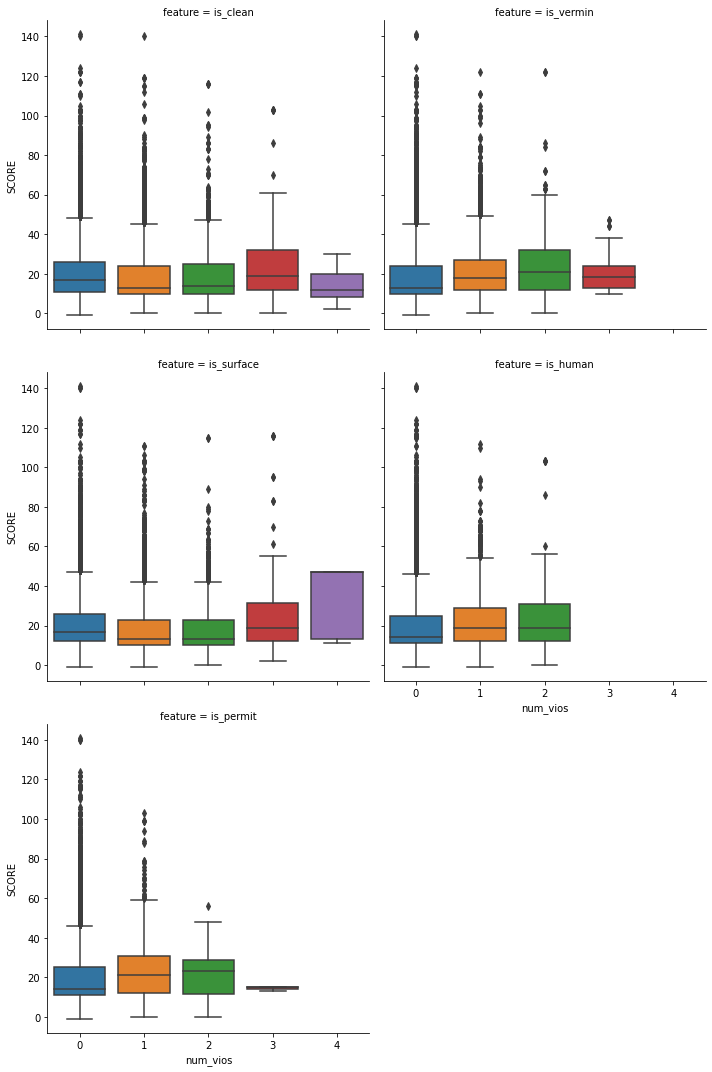

In [45]:
sns.catplot(x='num_vios', y='SCORE',
               col='feature', col_wrap=2,
               kind='box',
               data=violation_type_and_scores);

Above we see, for example, that if a restaurant inspection involved 2 violation with the keyword "vermin", the average score for that inspection would be around 25